# import lipraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# reading dataset

In [42]:
dataset = pd.read_csv(r'C:\Users\yousif\OneDrive\Desktop\diabetes_prediction_dataset.csv')
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# explore the data and clean it

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


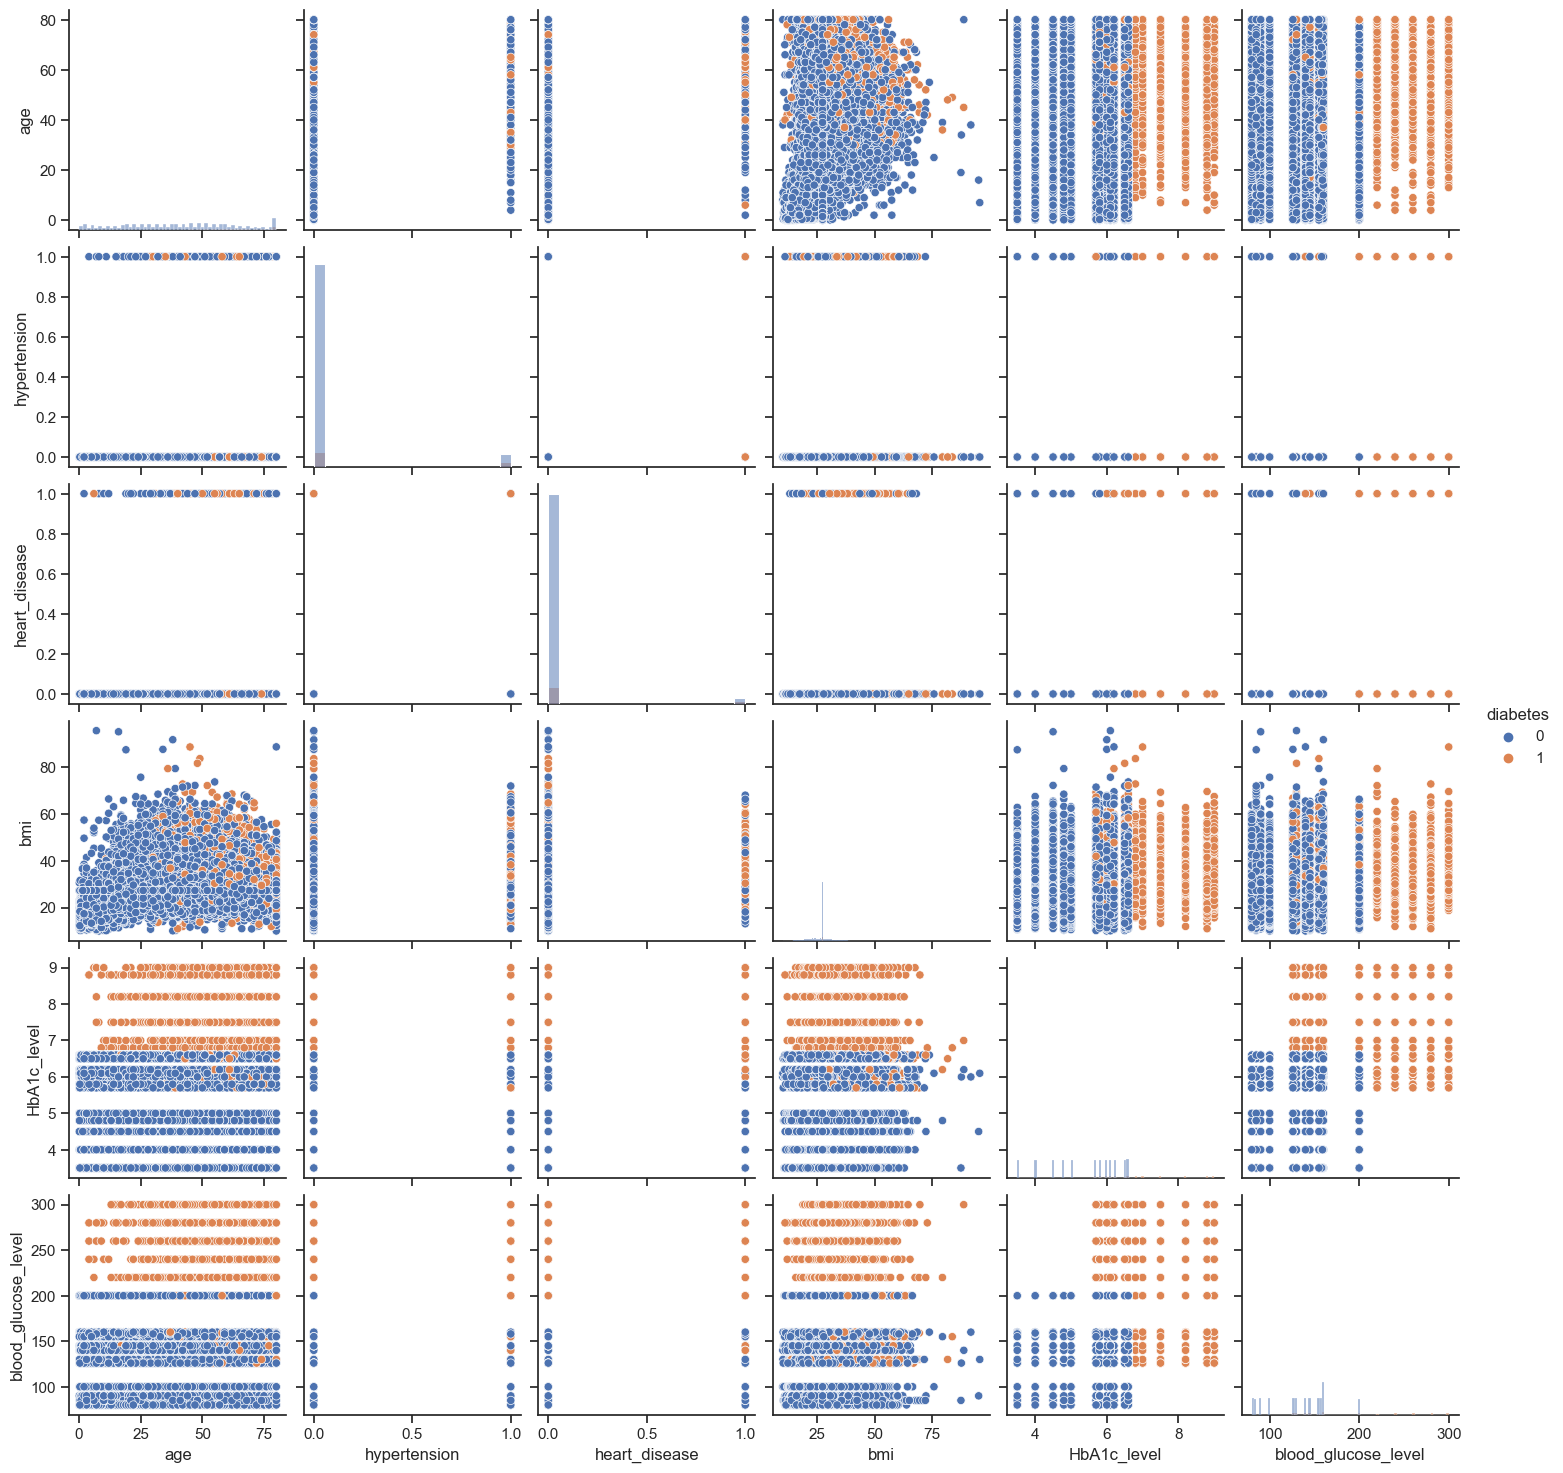

In [44]:
import seaborn as sns
df = dataset.drop('diabetes', axis=1)
df['diabetes'] = dataset['diabetes']
sns.set(style="ticks")
sns.pairplot(df, hue="diabetes", diag_kind="hist")
plt.show()

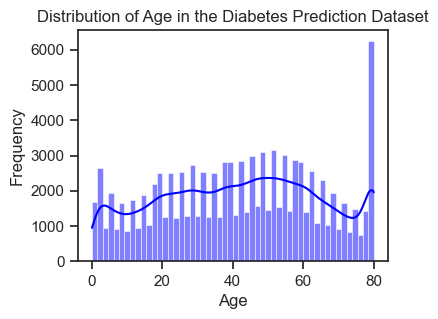

In [45]:
plt.figure(figsize=(4,3))
sns.histplot(data=dataset, x='age', kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in the Diabetes Prediction Dataset')
plt.show()

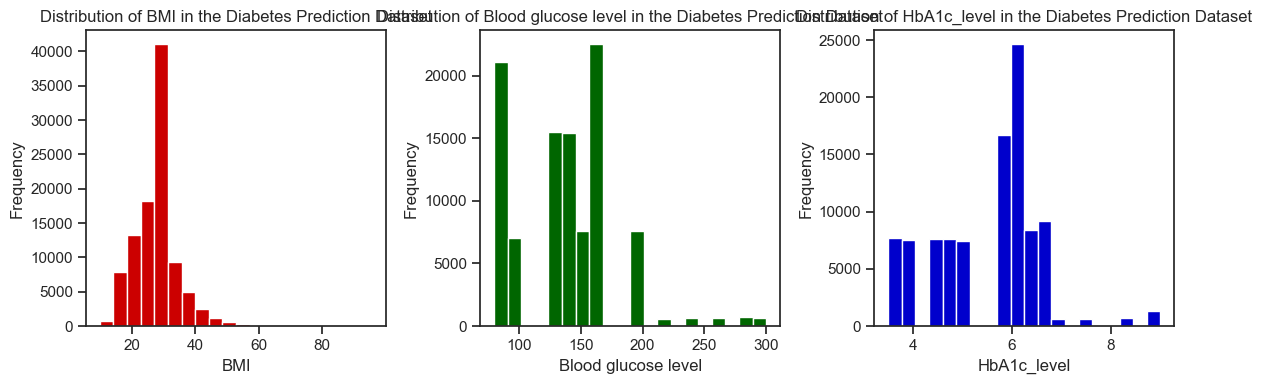

In [47]:

df = dataset.copy()
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(df['bmi'], bins=20, color=(0.8, 0, 0))
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of BMI in the Diabetes Prediction Dataset')

axs[1].hist(df['blood_glucose_level'], bins=20, color=(0, 0.4, 0))
axs[1].set_xlabel('Blood glucose level')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Blood glucose level in the Diabetes Prediction Dataset')

axs[2].hist(df['HbA1c_level'], bins=20, color=(0, 0, 0.8))
axs[2].set_xlabel('HbA1c_level')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of HbA1c_level in the Diabetes Prediction Dataset')

plt.tight_layout()
plt.show()

In [48]:
pd.Series(dataset['gender']).value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [49]:
dataset = dataset[dataset['gender'] != 'Other']

In [50]:
pd.Series(dataset['smoking_history']).value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

# extract features

In [51]:
target = dataset.iloc[:,-1]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [52]:
data = dataset.iloc[:,:-1]
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


# preprocessing the data

In [53]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , MinMaxScaler

In [54]:
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,never,25.19,6.6,140
1,0,54.0,0,0,No Info,27.32,6.6,80
2,1,28.0,0,0,never,27.32,5.7,158
3,0,36.0,0,0,current,23.45,5.0,155
4,1,76.0,1,1,current,20.14,4.8,155


In [55]:
data['smoking_history'] = LabelEncoder().fit_transform(data['smoking_history'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [56]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)

In [57]:
data.shape

(99982, 8)

# split the data into train and test

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

# knn classefier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred = classifier.predict(x_test)

C:\Users\yousif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### accurecy of model

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22677   177]
 [  790  1352]]


0.9613138102096336

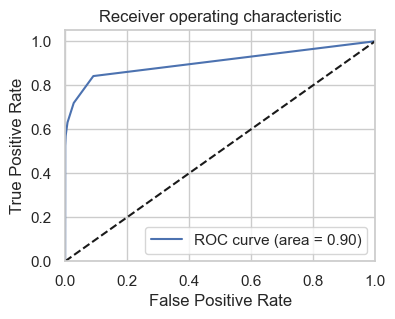

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gridsearchcv knn

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid={'n_neighbors':[8,9],
           'metric':['minkowski','Euclidean',],
           'p':[6,8]}

In [66]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [67]:
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\yousif\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yousif\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yousif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\yousif\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\yousif\anaconda3\lib\s

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'Euclidean'],
                         'n_neighbors': [8, 9], 'p': [6, 8]},
             verbose=3)

In [68]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

{'metric': 'minkowski', 'n_neighbors': 8, 'p': 6}


C:\Users\yousif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [69]:
#pd.DataFrame(grid.cv_results_)

In [70]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.961526,0.000681,"{'metric': 'minkowski', 'n_neighbors': 8, 'p': 6}"
1,0.961593,0.000516,"{'metric': 'minkowski', 'n_neighbors': 8, 'p': 8}"
2,0.961726,0.000816,"{'metric': 'minkowski', 'n_neighbors': 9, 'p': 6}"
3,0.961540,0.000875,"{'metric': 'minkowski', 'n_neighbors': 9, 'p': 8}"
4,NaN,NaN,"{'metric': 'Euclidean', 'n_neighbors': 8, 'p': 6}"
5,NaN,NaN,"{'metric': 'Euclidean', 'n_neighbors': 8, 'p': 8}"
6,NaN,NaN,"{'metric': 'Euclidean', 'n_neighbors': 9, 'p': 6}"
7,NaN,NaN,"{'metric': 'Euclidean', 'n_neighbors': 9, 'p': 8}"


In [71]:
accuracy=grid.best_score_
print(accuracy)

0.9615261621911438


# naive bayes Classifier

In [72]:
from sklearn.naive_bayes import BernoulliNB

In [73]:
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
BernoulliNBModel.fit(x_train, y_train)

BernoulliNB(binarize=1)

In [74]:
y_pred = BernoulliNBModel.predict(x_test)

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22380   474]
 [ 1234   908]]


0.9316690670507282

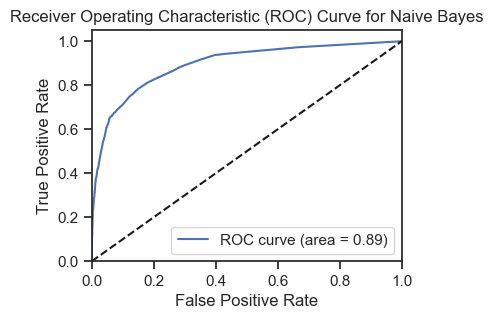

In [76]:

BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
BernoulliNBModel.fit(x_train, y_train)

y_pred_prob = BernoulliNBModel.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# gridsearchcv  naive bayes

In [77]:
param={'alpha':[1.0,0.9,0.1,0.5],
           'binarize':[6,2,3]}

In [78]:
grid = GridSearchCV(BernoulliNB(), param, refit = True, verbose = 3,n_jobs=-1)

In [79]:
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.9, 0.1, 0.5], 'binarize': [6, 2, 3]},
             verbose=3)

In [80]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

{'alpha': 1.0, 'binarize': 2}


In [81]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.915211,0.000032,"{'alpha': 1.0, 'binarize': 6}"
1,0.960033,0.000467,"{'alpha': 1.0, 'binarize': 2}"
2,0.937082,0.001264,"{'alpha': 1.0, 'binarize': 3}"
3,0.915211,0.000032,"{'alpha': 0.9, 'binarize': 6}"
4,0.960033,0.000467,"{'alpha': 0.9, 'binarize': 2}"
5,0.937082,0.001264,"{'alpha': 0.9, 'binarize': 3}"
6,0.915211,0.000032,"{'alpha': 0.1, 'binarize': 6}"
7,0.960033,0.000467,"{'alpha': 0.1, 'binarize': 2}"
8,0.937215,0.001062,"{'alpha': 0.1, 'binarize': 3}"
9,0.915211,0.000032,"{'alpha': 0.5, 'binarize': 6}"


In [82]:
accuracy=grid.best_score_
print(accuracy)

0.9600325399124363


# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

In [85]:
y_pred = DecisionTreeClassifierModel.predict(x_test)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22854     0]
 [  708  1434]]


0.971675468074892

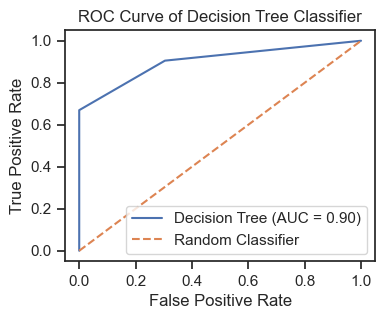

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = DecisionTreeClassifierModel.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree Classifier')
plt.legend()
plt.show()

# gridsearchcv decission tree

In [88]:
param_grid={'criterion':['entropy','gini'],
        'max_depth':[3,4,6],
      'random_state':[5,200,100]}

In [89]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [90]:
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 6],
                         'random_state': [5, 200, 100]},
             verbose=3)

In [91]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

{'criterion': 'entropy', 'max_depth': 3, 'random_state': 5}


In [92]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 3, 'rand..."
1,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 3, 'rand..."
2,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 3, 'rand..."
3,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 4, 'rand..."
4,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 4, 'rand..."
5,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 4, 'rand..."
6,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 6, 'rand..."
7,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 6, 'rand..."
8,0.971928,0.000231,"{'criterion': 'entropy', 'max_depth': 6, 'rand..."
9,0.971928,0.000231,"{'criterion': 'gini', 'max_depth': 3, 'random_..."


In [93]:
accuracy=grid.best_score_
print(accuracy)

0.9719280941132886


# Random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report

randomforest = RandomForestClassifier(criterion='entropy',n_estimators=12) #criterion can be gini  for classification

In [95]:
randomforest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [96]:
rf_prediction = randomforest.predict(x_test)

In [97]:
#print(classification_report(y_test,rf_prediction))

In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22854     0]
 [  708  1434]]


0.971675468074892

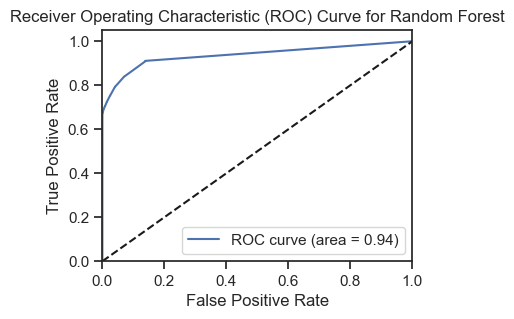

In [99]:

randomforest = RandomForestClassifier(criterion='entropy',n_estimators=12)
randomforest.fit(x_train,y_train)
y_pred_prob = randomforest.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Grid searchcv Random forest

In [100]:
param_grid={'criterion':['entropy','gini'],
            'n_estimators':[13,8,15]
           }

In [101]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [102]:
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': [13, 8, 15]},
             verbose=3)

In [103]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

{'criterion': 'gini', 'n_estimators': 8}


In [104]:
#pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

In [105]:
accuracy=grid.best_score_
print(accuracy)

0.9695409838068425


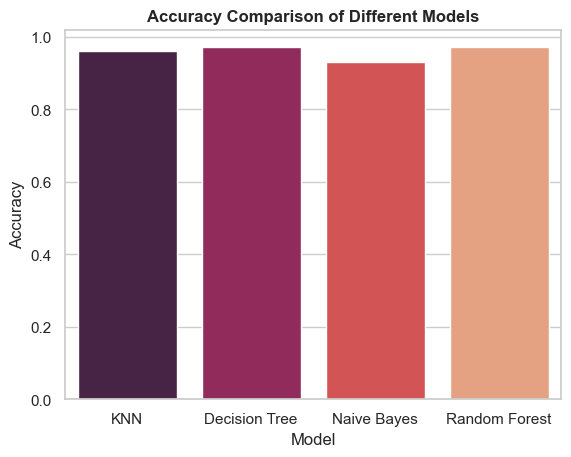

In [106]:

models = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
accuracies = [0.9613138102096336,0.971675468074892, 0.9316690670507282,0.971675468074892]
data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)
sns.set(style='whitegrid')
sns.barplot(x='Model', y='Accuracy', data=df, palette='rocket')
plt.title('Accuracy Comparison of Different Models', fontweight='bold')
plt.show()